## 1 - Importando as bibliotecas

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web

## 2 - Importando os dados e iniciando tratamento

In [69]:
Ativos = {
    
        # Índices Globais
    '^BVSP': "IBOVESPA",
    '^GSPC': "S&P 500",
    '^IXIC': "NASDAQ",
    'EEM': "Emerging Markets",
    '^GDAXI': "DAX",
    '^FTSE': "FTSE 100",
    '^N225': "Nikkei 225",
    '^HSI': "Hang Seng",
    
        # Moedas
    'EURUSD=X': "Euro/USD",
    'GBPUSD=X': "Libra/USD",
    'BRL=X': "Real/USD",
    
        # Commodities
    'GC=F': "Ouro",
    'BZ=F': "Petróleo Brent",
    
       # Criptomoedas 
    'BTC-USD': "Bitcoin",
    'ETH-USD': "Ethereum"
}

In [70]:
# Baixar dados usando apenas as keys do dicionário
Carteira = yf.download(list(Ativos.keys()), period="10y", progress=False)['Close']

# Remover linhas com NaN
Carteira = Carteira.dropna()

# Renomear colunas com nomes amigáveis
Carteira.rename(columns=Ativos, inplace=True)

Carteira

Ticker,Real/USD,Bitcoin,Petróleo Brent,Emerging Markets,Ethereum,Euro/USD,Libra/USD,Ouro,IBOVESPA,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225
Date,,,,,,,,,,,,,,,
2017-11-09,3.2513,7143.580078,63.930000,38.685246,320.884003,1.159689,1.311303,1285.599976,72931.0,7484.100098,13182.559570,2584.620117,29136.570312,6750.049805,22868.710938
2017-11-10,3.2487,6618.140137,63.520000,38.518826,299.252991,1.164687,1.314440,1272.400024,72166.0,7433.000000,13127.469727,2582.300049,29120.919922,6750.939941,22681.419922
2017-11-13,3.2764,6559.490234,63.160000,38.435612,316.716003,1.166113,1.312026,1277.300049,72475.0,7415.200195,13074.419922,2584.840088,29182.179688,6757.600098,22380.990234
2017-11-14,3.2759,6635.750000,62.209999,38.177662,337.631012,1.166494,1.312336,1281.500000,70827.0,7414.399902,13033.480469,2578.870117,29152.119141,6737.870117,22380.009766
2017-11-17,3.2706,7708.990234,62.720001,38.959846,332.394012,1.177745,1.320045,1295.800049,73437.0,7380.700195,12993.730469,2578.850098,29199.039062,6782.790039,22396.800781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-14,5.2965,94397.789062,64.389999,54.959999,3103.785645,1.163196,1.315218,4087.600098,157739.0,9698.400391,23876.550781,6734.109863,26572.460938,22900.589844,50376.531250
2025-11-17,5.2956,92093.875000,64.199997,54.310001,3024.538818,1.161535,1.316015,4068.300049,156993.0,9675.400391,23590.519531,6672.410156,26384.279297,22708.070312,50323.910156
2025-11-18,5.3295,92948.875000,64.889999,54.040001,3122.979004,1.159057,1.315616,4061.300049,156522.0,9552.299805,23180.529297,6617.319824,25930.029297,22432.849609,48702.980469


## 3 - Normalizando ativos

In [71]:
Ativos_normalizados = {}

# Loop para normalizar cada ativo da Carteira
for Ativo, serie in Carteira.items():
    # Normaliza a série: divide por o primeiro valor e multiplica por 1000
    serie_normalizada = (serie / serie.iloc[0]) * 1000
    serie_normalizada = serie_normalizada.rename(Ativo)  # renomeia a série
    
    # Armazena no dicionário
    Ativos_normalizados[Ativo] = serie_normalizada

# Concatena todas as séries normalizadas em um único DataFrame
Ativos_normalizados = pd.concat(Ativos_normalizados.values(), axis=1)

Ativos_normalizados


,Real/USD,Bitcoin,Petróleo Brent,Emerging Markets,Ethereum,Euro/USD,Libra/USD,Ouro,IBOVESPA,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225
Date,,,,,,,,,,,,,,,
2017-11-09,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2017-11-10,999.200261,926.445853,993.586738,995.698102,932.589310,1004.309337,1002.392361,989.732458,989.510633,993.172179,995.821006,999.102356,999.462861,1000.131871,991.810163
2017-11-13,1007.719986,918.235697,987.955569,993.547054,987.010885,1005.539064,1000.551090,993.543927,993.747515,990.793829,991.796764,1000.085108,1001.565365,1001.118554,978.673013
2017-11-14,1007.566140,928.910984,973.095554,986.879142,1052.190228,1005.867491,1000.787454,996.810847,971.150814,990.686897,988.691187,997.775302,1000.533653,998.195615,978.630139
2017-11-17,1005.936082,1079.149411,981.073063,1007.098339,1035.869690,1015.569822,1006.666267,1007.934096,1006.938065,986.184057,985.675839,997.767556,1002.143998,1004.850369,979.364374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-14,1629.040706,13214.353032,1007.195356,1420.696660,9672.609474,1003.024307,1002.985543,3179.527205,2162.852559,1295.867274,1811.222673,2605.454403,911.996870,3392.654944,2202.858368
2025-11-17,1628.763811,12891.837705,1004.223317,1403.894447,9425.645383,1001.591254,1003.592815,3164.514722,2152.623713,1292.794092,1789.524971,2581.582536,905.538264,3364.133743,2200.557360
2025-11-18,1639.190490,13011.525591,1015.016410,1396.915030,9732.423486,999.455191,1003.289088,3159.069793,2146.165554,1276.345810,1758.424013,2560.267863,889.947891,3323.360606,2129.677558


## 4 - Visualizando

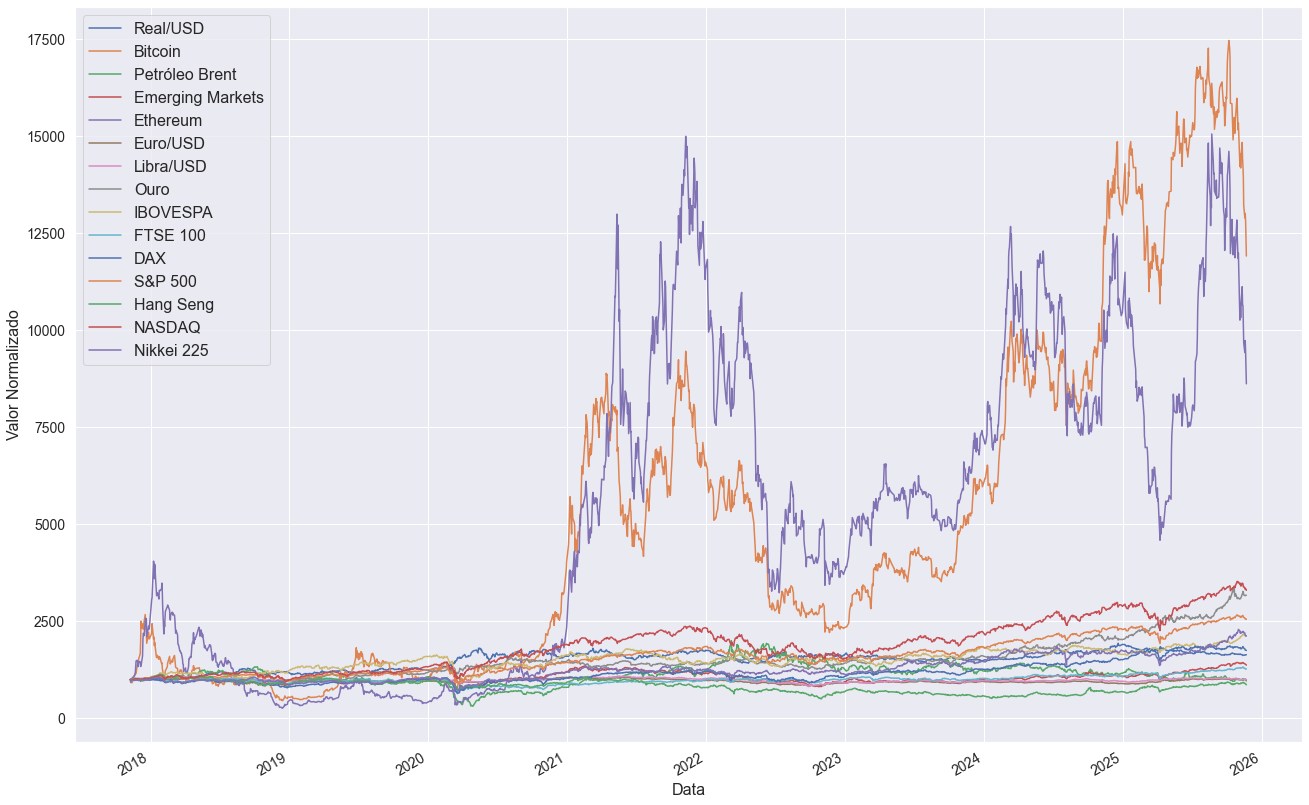

In [76]:
sns.set()
ax = Ativos_normalizados.plot(figsize=(22,15))

# Ajusta tamanho das fontes dos eixos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajusta tamanho da legenda
plt.legend(fontsize=16)

# Ajusta tamanho dos labels dos eixos
ax.set_xlabel("Data", fontsize=16)
ax.set_ylabel("Valor Normalizado", fontsize=16)

plt.show()


## 5 - Analisando Correlações

In [73]:
Carteira.corr()

Ticker,Real/USD,Bitcoin,Petróleo Brent,Emerging Markets,Ethereum,Euro/USD,Libra/USD,Ouro,IBOVESPA,FTSE 100,DAX,S&P 500,Hang Seng,NASDAQ,Nikkei 225
Ticker,,,,,,,,,,,,,,,
Real/USD,1.000000,0.647952,0.071682,0.418866,0.624742,-0.311742,-0.125759,0.663300,0.649297,0.163575,0.582018,0.725745,-0.540931,0.766957,0.612857
Bitcoin,0.647952,1.000000,0.171408,0.694972,0.838331,-0.063204,0.211913,0.910102,0.792582,0.733792,0.951732,0.942671,-0.298733,0.943399,0.903678
Petróleo Brent,0.071682,0.171408,1.000000,-0.011804,0.427731,-0.465728,-0.215105,0.045051,0.240065,0.406234,0.183135,0.295410,-0.463518,0.219926,0.286523
Emerging Markets,0.418866,0.694972,-0.011804,1.000000,0.639945,0.501455,0.698021,0.606147,0.609799,0.435647,0.648723,0.622411,0.257477,0.688593,0.588263
Ethereum,0.624742,0.838331,0.427731,0.639945,1.000000,-0.121202,0.193345,0.680196,0.713749,0.592587,0.764932,0.863841,-0.425702,0.869658,0.815627
Euro/USD,-0.311742,-0.063204,-0.465728,0.501455,-0.121202,1.000000,0.873170,-0.115991,-0.203707,-0.177884,-0.091522,-0.233871,0.775054,-0.149570,-0.208396
Libra/USD,-0.125759,0.211913,-0.215105,0.698021,0.193345,0.873170,1.000000,0.072103,0.062365,0.057617,0.168828,0.062599,0.634760,0.130267,0.051172
Ouro,0.663300,0.910102,0.045051,0.606147,0.680196,-0.115991,0.072103,1.000000,0.807375,0.706252,0.936050,0.916213,-0.345076,0.912925,0.886541
IBOVESPA,0.649297,0.792582,0.240065,0.609799,0.713749,-0.203707,0.062365,0.807375,1.000000,0.604806,0.816651,0.882414,-0.461348,0.879071,0.855307


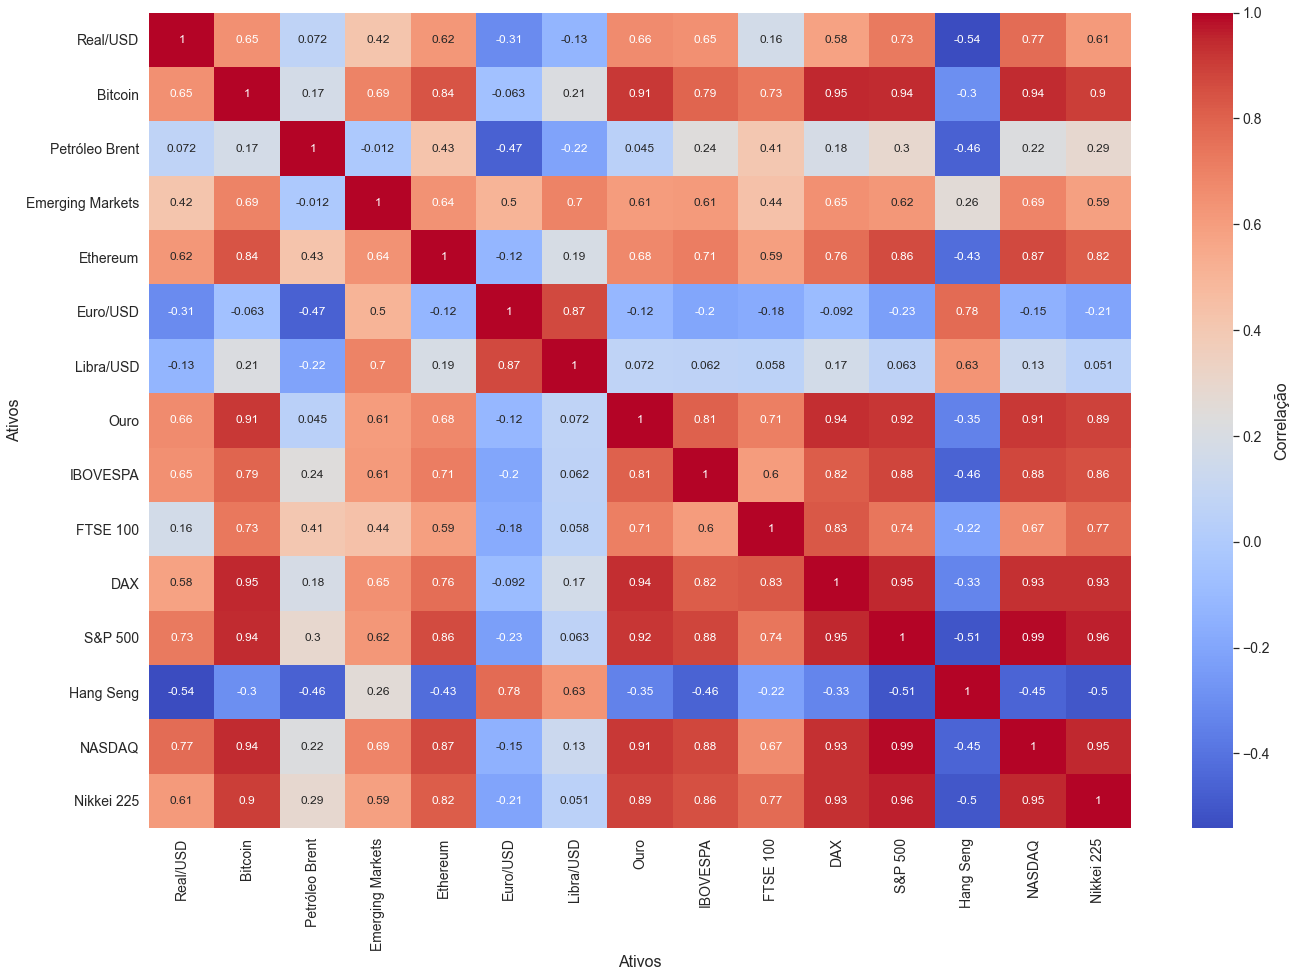

In [81]:
# Cria a figura com tamanho definido
plt.figure(figsize=(22,15))

# Gera o heatmap de correlação e captura o Axes
ax = sns.heatmap(Ativos_normalizados.corr(), annot=True, cmap="coolwarm")

# Ajusta tamanho das fontes dos eixos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajusta tamanho dos labels dos eixos
ax.set_xlabel("Ativos", fontsize=16)
ax.set_ylabel("Ativos", fontsize=16)

# Ajusta título da barra de cores (colorbar)
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14)
colorbar.set_label("Correlação", fontsize=16)

# Mostra o gráfico
plt.show()

## 6 - Analisando a evolução das Correlações ao longo do tempo

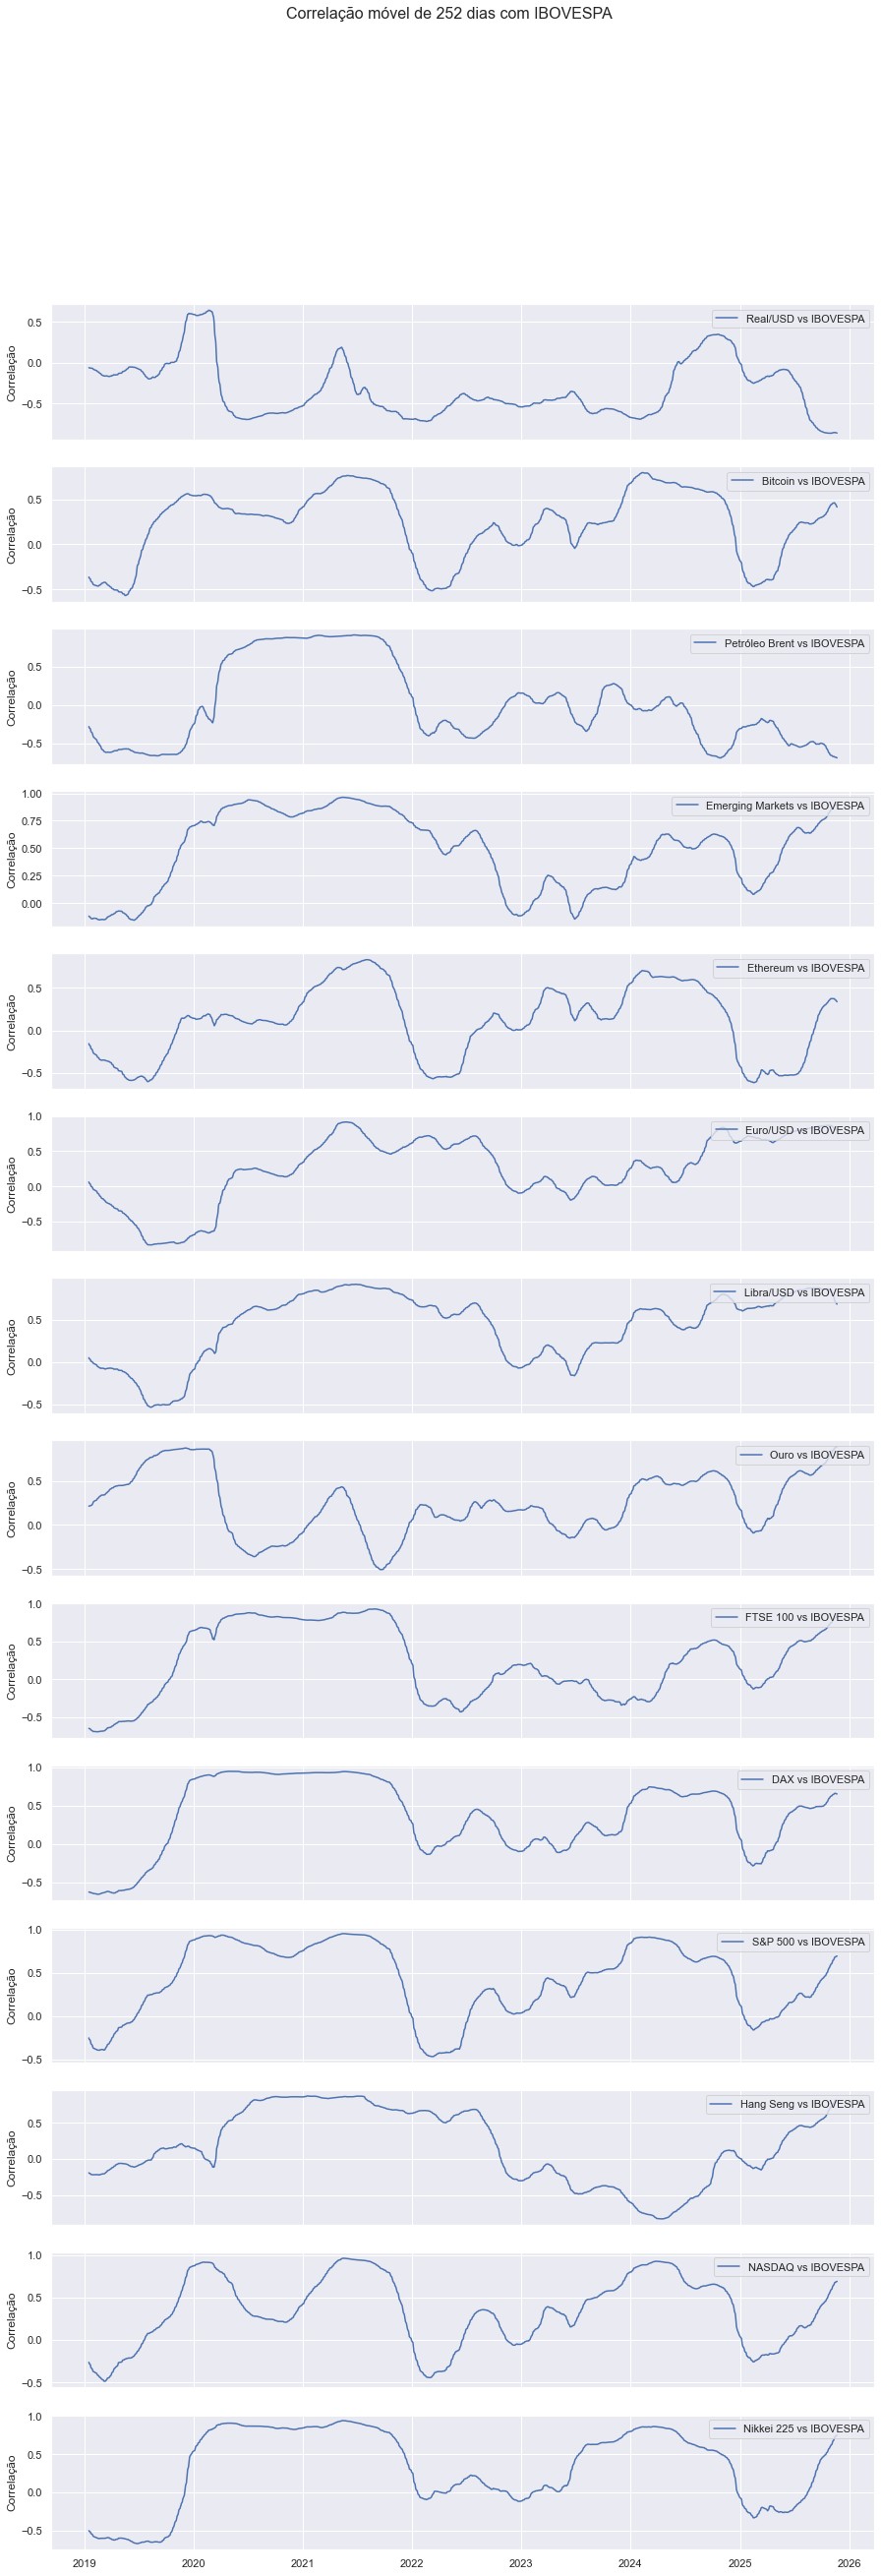

In [85]:
# Número de ativos (excluindo IBOVESPA)
ativos = [ticker for ticker in Carteira.columns if ticker != "IBOVESPA"]
n = len(ativos)

# Define o grid de subplots
fig, axes = plt.subplots(n, 1, figsize=(15, 3*n), sharex=True)

# Loop para cada ativo
for i, ticker in enumerate(ativos):
    rolling_corr = Carteira[ticker].rolling(252).corr(Carteira["IBOVESPA"])
    axes[i].plot(rolling_corr, label=f"{ticker} vs IBOVESPA")
    axes[i].legend(loc="upper right")
    axes[i].set_ylabel("Correlação")

# Título geral
plt.suptitle("Correlação móvel de 252 dias com IBOVESPA", fontsize=16)
plt.show()